# Explore Data #
## Structure ##
## Granularity ##
## Variability ##

In [1]:
import os
import pandas as pd
from pandas.io import sql
import datetime
import numpy as np
import seaborn as sns

In [2]:
# STEP 1: EXTRACT DATA"
    
# Load the log file equipment
df_sensor = pd.read_csv("filename.csv",
                        sep=",",
                        encoding='utf8')


In [3]:
# 1- Collect information about the dataset.
df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           18000 non-null  object 
 1   location            18000 non-null  object 
 2   prd_line            18000 non-null  object 
 3   equipment           18000 non-null  object 
 4   operational_status  18000 non-null  int64  
 5   fail_status         1815 non-null   object 
 6   measurement_0       18000 non-null  float64
 7   quality_0           18000 non-null  object 
 8   measurement_1       18000 non-null  float64
 9   quality_1           18000 non-null  object 
 10  measurement_2       18000 non-null  float64
 11  quality_2           18000 non-null  object 
 12  measurement_3       18000 non-null  float64
 13  quality_3           18000 non-null  object 
 14  measurement_4       18000 non-null  float64
 15  quality_4           18000 non-null  object 
 16  meas

In [4]:
# 2- Verify the dataset data types.
df_sensor.dtypes

timestamp              object
location               object
prd_line               object
equipment              object
operational_status      int64
fail_status            object
measurement_0         float64
quality_0              object
measurement_1         float64
quality_1              object
measurement_2         float64
quality_2              object
measurement_3         float64
quality_3              object
measurement_4         float64
quality_4              object
measurement_5         float64
quality_5              object
measurement_6         float64
quality_6              object
measurement_7         float64
quality_7              object
measurement_8         float64
quality_8              object
measurement_9         float64
quality_9              object
measurement_10        float64
quality_10             object
measurement_11        float64
quality_11             object
dtype: object

In [5]:
# 3 - Convert data types
df_sensor = df_sensor.convert_dtypes()
df_sensor.dtypes

timestamp              string
location               string
prd_line               string
equipment              string
operational_status      Int64
fail_status            string
measurement_0           Int64
quality_0              string
measurement_1         Float64
quality_1              string
measurement_2         Float64
quality_2              string
measurement_3         Float64
quality_3              string
measurement_4         Float64
quality_4              string
measurement_5         Float64
quality_5              string
measurement_6         Float64
quality_6              string
measurement_7         Float64
quality_7              string
measurement_8         Float64
quality_8              string
measurement_9         Float64
quality_9              string
measurement_10        Float64
quality_10             string
measurement_11        Float64
quality_11             string
dtype: object

In [6]:
# convert the column for timestamp format.
df_sensor['timestamp'] = pd.to_datetime(df_sensor["timestamp"])

In [7]:
df_sensor['timestamp']

0       2021-12-13 10:00:00
1       2021-12-13 10:00:00
2       2021-12-13 10:00:02
3       2021-12-13 10:00:02
4       2021-12-13 10:00:03
                ...        
17995   2021-12-13 14:59:56
17996   2021-12-13 14:59:56
17997   2021-12-13 14:59:57
17998   2021-12-13 14:59:59
17999   2021-12-13 14:59:59
Name: timestamp, Length: 18000, dtype: datetime64[ns]

<AxesSubplot:>

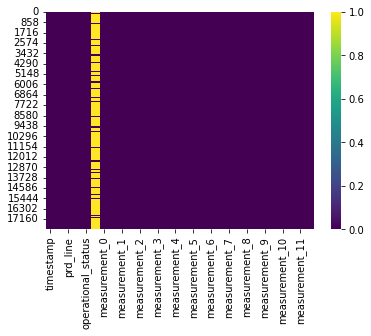

In [8]:
# visualize NAN values

sns.heatmap(df_sensor.isnull(), cmap='viridis')

In [9]:
# Verify missing values

def chk_missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    df_mz = pd.concat([mis_val, mis_val_percent], axis=1)
    df_mz = df_mz.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    df_mz['Total Missing Values'] = df_mz['Missing Values']
    df_mz['% Total Missing Values'] = 100 * df_mz['Total Missing Values'] / len(df)
    df_mz['Data Type'] = df.dtypes
    df_mz = df_mz[df_mz.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print ("\nThe dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
           "\nThere are " + str(df_mz.shape[0]) +" columns that have missing values.")
    return df_mz

#######################################################################################################

chk_missing_values(df_sensor)


The dataframe has 30 columns and 18000 Rows.

There are 1 columns that have missing values.


,Missing Values,% of Total Values,Total Missing Values,% Total Missing Values,Data Type
fail_status,16185,89.9,16185,89.9,string


In [24]:
def ajuste_nan_cat(df):
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    non_numeric_cols = df_non_numeric.columns.values
    for col in non_numeric_cols:
        missing = df[col].isnull()
        num_missing = np.sum(missing)
        if num_missing > 0:  # impute values only for columns that have missing values.
            mod = df[col].describe()['top'] # impute with the most frequently occuring value.
            df[col] = df[col].fillna(mod)
    return df

In [25]:
df_sensor= ajuste_nan_cat(df_sensor)

In [26]:
# Missing values fixed.
chk_missing_values(df_sensor)


The dataframe has 30 columns and 18000 Rows.

There are 0 columns that have missing values.


,Missing Values,% of Total Values,Total Missing Values,% Total Missing Values,Data Type


In [27]:
# remove blank spaces from columns.
df_sensor.columns = [x.strip().replace(' ', "") for x in df_sensor.columns]

In [28]:
def data_wrangler(df):
    # map nans, to drop NAs rows and columns later
    df = df.replace('', np.nan)
    # remove rows containing only NAs
    df = df.dropna(how='all', axis=0)
    # remove columns containing only NAs
    df = df.dropna(how='all', axis=1)
    df= df.convert_dtypes()
    
    return df

df_sensor = data_wrangler(df_sensor)
df_sensor.head(7)

,timestamp,location,prd_line,equipment,operational_status,fail_status,measurement_0,quality_0,measurement_1,quality_1,...,measurement_7,quality_7,measurement_8,quality_8,measurement_9,quality_9,measurement_10,quality_10,measurement_11,quality_11
0,2021-12-13 10:00:00,Serra-ES,LINE_1,CALDEIRAS,1,LOST_COMUNICATION,1,GOOD,2.143447,GOOD,...,10.920708,GOOD,5.728287,GOOD,6.16152,GOOD,11.619858,GOOD,9.968401,GOOD
1,2021-12-13 10:00:00,Serra-ES,LINE_3,CALDEIRAS,1,LOST_COMUNICATION,1,UNCERTAIN,2.065815,GOOD,...,1.994413,GOOD,4.86444,GOOD,20.889153,GOOD,5.522771,UNCERTAIN,10.762755,GOOD
2,2021-12-13 10:00:02,Serra-ES,LINE_1,ESTEIRA,1,LOST_COMUNICATION,1,GOOD,2.03662,GOOD,...,8.006534,GOOD,2.160102,GOOD,9.647112,GOOD,14.883096,GOOD,10.575115,BAD
3,2021-12-13 10:00:02,Vila Velha-ES,LINE_1,ESTEIRA,1,LOST_COMUNICATION,1,GOOD,2.05408,GOOD,...,2.999302,GOOD,3.474794,GOOD,13.214983,GOOD,7.549217,UNCERTAIN,4.29112,GOOD
4,2021-12-13 10:00:03,Santos-SP,LINE_1,BIOREATOR,1,LOST_COMUNICATION,1,GOOD,1.955951,GOOD,...,12.003081,GOOD,9.969707,GOOD,4.622861,GOOD,20.982421,BAD,13.672785,GOOD
5,2021-12-13 10:00:03,Serra-ES,LINE_3,COGERAÇÃO,1,LOST_COMUNICATION,1,GOOD,2.208203,GOOD,...,5.838597,UNCERTAIN,8.289185,GOOD,16.845207,GOOD,6.052791,GOOD,11.95307,GOOD
6,2021-12-13 10:00:03,Serra-ES,LINE_1,BIOREATOR,1,LOST_COMUNICATION,1,GOOD,1.125384,GOOD,...,7.795372,GOOD,5.93173,GOOD,15.229691,GOOD,5.930138,UNCERTAIN,17.423209,UNCERTAIN


# Handling columns location and timestamp #
# Column location split into two columns cidade e estado #
# Column timestamp split into date, hour, minute, second e microseconds #

In [29]:
# Column location split into two columns cidade e estado.
df_sensor['estado'] = df_sensor['location'].str.split('-').str[1]
df_sensor['cidade'] = df_sensor['location'].str.split('-').str[0]

In [30]:
df_sensor['data']= df_sensor['timestamp'].dt.normalize()
df_sensor['hora']= df_sensor['timestamp'].dt.hour
df_sensor['minuto']= df_sensor['timestamp'].dt.minute
df_sensor['segundo']= df_sensor['timestamp'].dt.second
df_sensor['microsegundo']= df_sensor['timestamp'].dt.microsecond/1000

In [31]:
df_sensor.tail(3)

,timestamp,location,prd_line,equipment,operational_status,fail_status,measurement_0,quality_0,measurement_1,quality_1,...,quality_10,measurement_11,quality_11,estado,cidade,data,hora,minuto,segundo,microsegundo
17997,2021-12-13 14:59:57,Caxias do Sul-RS,LINE_3,COGERAÇÃO,1,LOST_COMUNICATION,1,GOOD,1.8927,GOOD,...,GOOD,8.937103,GOOD,RS,Caxias do Sul,2021-12-13,14,59,57,0.0
17998,2021-12-13 14:59:59,Mauá-SP,LINE_1,COGERAÇÃO,1,LOST_COMUNICATION,1,UNCERTAIN,1.569316,GOOD,...,UNCERTAIN,19.364115,GOOD,SP,Mauá,2021-12-13,14,59,59,0.0
17999,2021-12-13 14:59:59,Serra-ES,LINE_1,COGERAÇÃO,1,LOST_COMUNICATION,1,GOOD,2.128198,UNCERTAIN,...,UNCERTAIN,14.077669,GOOD,ES,Serra,2021-12-13,14,59,59,0.0


In [ ]:
"""
A column that has a single value has a variance of 0.0
and a column that has very few unique values may have a small variance.
"""

In [53]:
# explore the effect of limits of variation on the number of numerical characteristics selected
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot

# Extract only columns with numeric values in order to check the variance
df_numeric = df_sensor.select_dtypes(include=[np.number])

# split data into inputs and outputs

data = df_numeric.values
X = data[:, :-1]
y = data[:, -1]
print("Linhas & Colunas: ",X.shape, y.shape)

# set limits to check
thresholds = arange(0.0, 0.55, 0.05)

# apply transformation with each limit
results = list()
for t in thresholds:
    
    # set the transformation
    transform = VarianceThreshold(threshold=t)
    
    # transform input data
    X_sel = transform.fit_transform(X)
    
    # determine the number of input characteristics
    n_features = X_sel.shape[1]
    print('>Limite = %.2f, Características = %d' % (t, n_features))
    
    # store the result
    results.append(n_features)

Linhas & Colunas:  (18000, 16) (18000,)
>Limite = 0.00, Características = 15
>Limite = 0.05, Características = 15
>Limite = 0.10, Características = 14
>Limite = 0.15, Características = 14
>Limite = 0.20, Características = 14
>Limite = 0.25, Características = 13
>Limite = 0.30, Características = 13
>Limite = 0.35, Características = 13
>Limite = 0.40, Características = 13
>Limite = 0.45, Características = 13
>Limite = 0.50, Características = 13


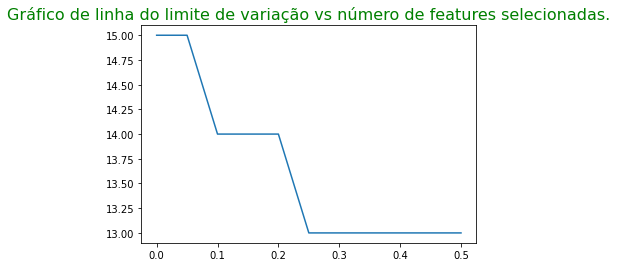

In [60]:
pyplot.plot(thresholds, results)
pyplot.title('Line graph of variation threshold vs number of selected features.', color='green', fontsize=16)
pyplot.show()

#### The chart above allows us to assess the level of variability in the data, and thus decide to exclude columns that show low variability.. ###

In [88]:
# Check for duplicate values.

df_sensor.duplicated().sum()

0

## Visualize data distribution ##

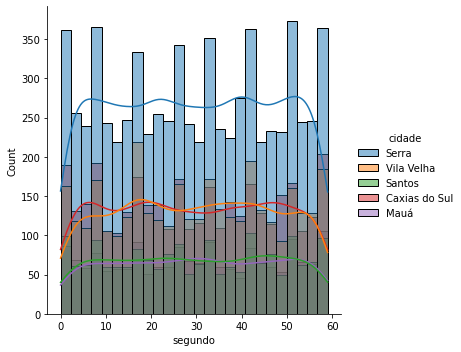

In [61]:
# distribution of data in the dataset.
sns.displot(data=df_sensor, x="segundo", kde=True, hue="cidade")

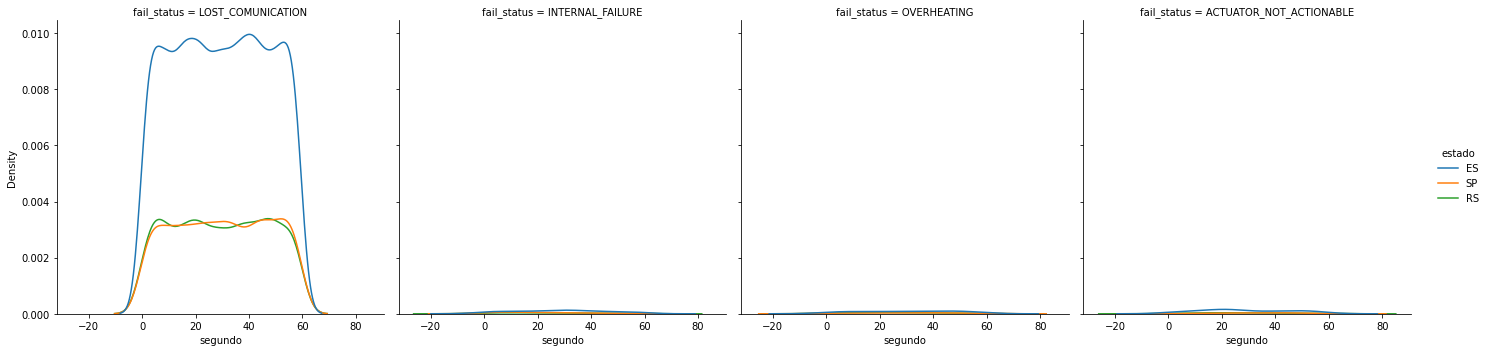

In [62]:
sns.displot(data=df_sensor, x="segundo", hue="estado", col="fail_status", kind="kde")

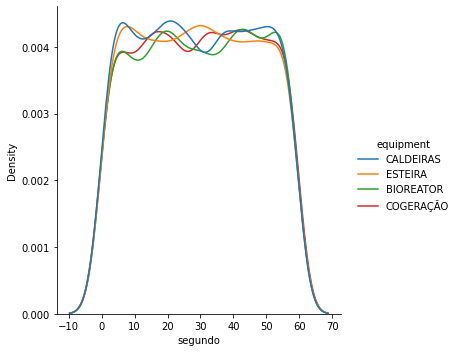

In [63]:
sns.displot(data=df_sensor, x="segundo", hue="equipment", kind="kde")

## Upload the dataframe to the Snowflake cloud environment. ##

In [90]:
from sqlalchemy import create_engine
import pandas as pd

snowflake_username = 'username'
snowflake_password = 'password'
snowflake_account = 'accoutname'
snowflake_warehouse = 'warehouse'
snowflake_database = 'database'
snowflake_schema = 'public'


engine = create_engine(
    'snowflake://{user}:{password}@{account}/{db}/{schema}?warehouse={warehouse}'.format(
        user=snowflake_username,
        password=snowflake_password,
        account=snowflake_account,
        db=snowflake_database,
        schema=snowflake_schema,
        warehouse=snowflake_warehouse,
        ),echo_pool=True, pool_size=10, max_overflow=20
    )

try:
    connection = engine.connect()
    
    df_sensor.columns = map(str.upper, df_sensor.columns)
    df_sensor.to_sql('tb_equipments'.lower(), con=connection, schema='public', index=False, if_exists='append', chunksize=16000)
    results = connection.execute('select count(1) from tb_equipments').fetchone()
    
    print('\nTotal de linhas inseridas: ',results[0], '\n')
    
finally:
    connection.close()
    engine.dispose()


Total lines inserted:  18000 

2022-01-11 01:48:24,872 INFO sqlalchemy.pool.impl.QueuePool Pool disposed. Pool size: 10  Connections in pool: 0 Current Overflow: -10 Current Checked out connections: 0
2022-01-11 01:48:24,876 INFO sqlalchemy.pool.impl.QueuePool Pool recreating
